# **project**

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle
import gradio as gr

In [ ]:
data = pd.read_csv('laptop_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [ ]:
data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


## Feature Extractio

In [ ]:
data['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [ ]:
filtered_data = data.drop(columns=['Unnamed: 0','Price']).copy()

In [ ]:
ty = []
for i in data['ScreenResolution']:
  if "Retina Display" in i:
    ty.append("Retina Display")
  elif "Full HD" and 'Touchscreen' in i:
    ty.append("Full HD Touchscreen")
  elif "Full HD"in i:
    ty.append("Full HD")
  elif '4K Ultra HD' in i:
    ty.append("4K")
  elif 'Quad' in i:
    ty.append("Quad")
  elif 'IPS Panel' in i:
    ty.append("IPS Panel")
  else:
    ty.append('Other')
ty

['Retina Display',
 'Other',
 'Full HD',
 'Retina Display',
 'Retina Display',
 'Other',
 'Retina Display',
 'Other',
 'Full HD',
 'Full HD',
 'Other',
 'Full HD',
 'Retina Display',
 'Full HD',
 'Retina Display',
 'Retina Display',
 'Full HD',
 'Retina Display',
 'Full HD',
 'Full HD Touchscreen',
 'Other',
 'Full HD',
 'Other',
 'Full HD Touchscreen',
 'Full HD',
 'Other',
 'Other',
 'Full HD',
 'Full HD',
 'Full HD',
 'Full HD',
 'Other',
 'Full HD',
 'Full HD Touchscreen',
 'Other',
 'Other',
 'Other',
 'Full HD',
 'Other',
 'Full HD',
 'Full HD',
 'Full HD',
 'Other',
 'Full HD',
 'Full HD Touchscreen',
 'Retina Display',
 'Other',
 'Full HD',
 'Full HD',
 'Other',
 'Full HD Touchscreen',
 'Full HD',
 'Full HD',
 'Full HD',
 'Other',
 'Full HD',
 'Full HD',
 'Other',
 'Full HD',
 'Full HD',
 'Full HD',
 'Full HD',
 'Full HD',
 'Full HD',
 'Full HD',
 'Full HD',
 'Other',
 'Other',
 'Full HD',
 'Full HD',
 'Full HD Touchscreen',
 'Full HD',
 'Full HD',
 'Full HD',
 'Other',
 'Full 

In [ ]:
filtered_data['screen_type'] = pd.DataFrame(ty)

In [ ]:
filtered_data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,screen_type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,Retina Display
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,Other
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,Full HD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,Retina Display
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,Retina Display
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,Full HD Touchscreen
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,Full HD Touchscreen
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,Other
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,Other


In [ ]:
filtered_data.drop(columns=['ScreenResolution'], inplace=True)

In [ ]:
filtered_data

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,screen_type
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,Retina Display
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,Other
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,Full HD
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,Retina Display
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,Retina Display
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,Full HD Touchscreen
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,Full HD Touchscreen
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,Other
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,Other


In [ ]:
se = []
for i in data['ScreenResolution']:
  se.append(re.findall(r'\d+', i))
se

[['2560', '1600'],
 ['1440', '900'],
 ['1920', '1080'],
 ['2880', '1800'],
 ['2560', '1600'],
 ['1366', '768'],
 ['2880', '1800'],
 ['1440', '900'],
 ['1920', '1080'],
 ['1920', '1080'],
 ['1366', '768'],
 ['1920', '1080'],
 ['2880', '1800'],
 ['1920', '1080'],
 ['2304', '1440'],
 ['2560', '1600'],
 ['1920', '1080'],
 ['2880', '1800'],
 ['1920', '1080'],
 ['1920', '1080'],
 ['1366', '768'],
 ['1920', '1080'],
 ['1366', '768'],
 ['1920', '1080'],
 ['1920', '1080'],
 ['1366', '768'],
 ['1440', '900'],
 ['1920', '1080'],
 ['1920', '1080'],
 ['1920', '1080'],
 ['1920', '1080'],
 ['1366', '768'],
 ['1920', '1080'],
 ['3200', '1800'],
 ['1440', '900'],
 ['1366', '768'],
 ['1366', '768'],
 ['1920', '1080'],
 ['1366', '768'],
 ['1920', '1080'],
 ['1920', '1080'],
 ['1920', '1080'],
 ['1366', '768'],
 ['1920', '1080'],
 ['1920', '1080'],
 ['2560', '1600'],
 ['1366', '768'],
 ['1920', '1080'],
 ['1920', '1080'],
 ['1366', '768'],
 ['1920', '1200'],
 ['1920', '1080'],
 ['1920', '1080'],
 ['1920',

In [ ]:
filter_list = []
for i in se:
  if len(i) < 3:
    i = ['0'] + i
  filter_list.append([int(x) for x in i])

In [ ]:
filter_list = pd.DataFrame(filter_list)

In [ ]:
filter_list

,0,1,2
0,0,2560,1600
1,0,1440,900
2,0,1920,1080
3,0,2880,1800
4,0,2560,1600
...,...,...,...
1298,0,1920,1080
1299,0,3200,1800
1300,0,1366,768
1301,0,1366,768


In [ ]:
filtered_data['Screen_width'] = filter_list[1]
filtered_data['Screen_height'] = filter_list[2]
filtered_data

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,screen_type,Screen_width,Screen_height
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,Retina Display,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,Other,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,Full HD,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,Retina Display,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,Retina Display,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,Full HD Touchscreen,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,Full HD Touchscreen,3200,1800
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,Other,1366,768
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,Other,1366,768


In [ ]:
data['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core i5 7200U 2.70GHz,1
Intel Core M M7-6Y75 1.2GHz,1
Intel Core M 6Y54 1.1GHz,1


In [ ]:
cpu_li = []
for i in data['Cpu']:
  if 'Intel Core' in i:
    cpu_li.append('Intel Core')
  elif 'Celeron Dual Core' in i:
    cpu_li.append('Intel Celeron Dual Core')
  elif ' Pentium' in i:
    cpu_li.append('Intel  Pentium Cores')
  elif 'Celeron Quad Core' in i:
    cpu_li.append('Intel Celeron Quad Core')
  elif 'Intel Atom' in i:
    cpu_li.append('Intel Atom')
  elif 'E-Series' in i:
    cpu_li.append('AMD E-Series')
  elif 'AMD A' in i:
    cpu_li.append('AMD A-Series')
  elif 'Xeon' in i:
    cpu_li.append('Intel Xeon')
  elif 'Ryzen' in i:
    cpu_li.append('AMD Ryzen')
  elif 'FX' in i:
    cpu_li.append('AMD FX')
  else:
    cpu_li.append(i)

In [ ]:
filtered_data['cpu_Tech'] = pd.DataFrame(cpu_li)

In [ ]:
data['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
ghz = []
for i in data['Cpu']:
  var = re.findall(r"(\d+\.\d+|\d+)GHz",i)
  ghz.append([float(x) for x in var])
ghz

[[2.3],
 [1.8],
 [2.5],
 [2.7],
 [3.1],
 [3.0],
 [2.2],
 [1.8],
 [1.8],
 [1.6],
 [2.5],
 [2.0],
 [2.8],
 [2.0],
 [1.2],
 [2.3],
 [2.7],
 [2.9],
 [2.4],
 [1.6],
 [1.44],
 [2.5],
 [1.5],
 [1.6],
 [1.8],
 [2.0],
 [1.6],
 [1.6],
 [1.9],
 [1.6],
 [1.44],
 [1.5],
 [2.5],
 [1.8],
 [1.6],
 [1.1],
 [2.7],
 [1.6],
 [2.5],
 [1.6],
 [2.0],
 [2.8],
 [2.5],
 [1.6],
 [1.6],
 [2.0],
 [2.0],
 [3.0],
 [2.5],
 [1.1],
 [1.44],
 [1.8],
 [2.5],
 [1.8],
 [2.4],
 [1.8],
 [2.0],
 [2.5],
 [2.8],
 [2.0],
 [1.8],
 [1.6],
 [2.7],
 [1.6],
 [2.5],
 [2.8],
 [2.0],
 [1.6],
 [2.5],
 [2.8],
 [2.5],
 [1.8],
 [1.8],
 [2.5],
 [2.0],
 [2.8],
 [2.5],
 [1.8],
 [2.7],
 [1.6],
 [1.6],
 [1.3],
 [1.6],
 [2.5],
 [3.0],
 [2.8],
 [1.8],
 [2.5],
 [2.8],
 [1.8],
 [3.0],
 [1.8],
 [1.8],
 [2.5],
 [2.7],
 [1.6],
 [2.7],
 [2.0],
 [2.4],
 [2.8],
 [2.7],
 [1.5],
 [1.6],
 [2.7],
 [2.5],
 [2.5],
 [2.0],
 [2.7],
 [2.8],
 [2.7],
 [1.8],
 [2.4],
 [2.5],
 [1.6],
 [1.6],
 [1.6],
 [1.8],
 [1.8],
 [2.0],
 [1.8],
 [2.4],
 [2.8],
 [2.5],
 [1.8],
 [3.0

In [ ]:
filtered_data['GHz'] = pd.DataFrame(ghz)

In [ ]:
cpu = []
for i in data['Cpu']:
  cpu_var = re.findall(r'i(\d+)',i)
  cpu.append([int(x) for x in cpu_var])
cpu

[[5],
 [5],
 [5],
 [7],
 [5],
 [],
 [7],
 [5],
 [7],
 [5],
 [5],
 [3],
 [7],
 [3],
 [],
 [5],
 [7],
 [7],
 [3],
 [5],
 [],
 [5],
 [],
 [5],
 [7],
 [3],
 [5],
 [5],
 [7],
 [5],
 [],
 [],
 [],
 [7],
 [5],
 [],
 [3],
 [5],
 [5],
 [5],
 [3],
 [7],
 [5],
 [5],
 [5],
 [5],
 [3],
 [],
 [5],
 [],
 [],
 [7],
 [],
 [7],
 [3],
 [7],
 [3],
 [5],
 [7],
 [3],
 [7],
 [5],
 [3],
 [5],
 [5],
 [7],
 [3],
 [],
 [5],
 [7],
 [5],
 [7],
 [7],
 [5],
 [3],
 [7],
 [5],
 [7],
 [3],
 [5],
 [5],
 [5],
 [5],
 [],
 [],
 [7],
 [7],
 [5],
 [7],
 [7],
 [],
 [7],
 [7],
 [5],
 [7],
 [5],
 [7],
 [3],
 [3],
 [7],
 [7],
 [],
 [5],
 [7],
 [5],
 [5],
 [3],
 [7],
 [7],
 [7],
 [7],
 [7],
 [5],
 [5],
 [5],
 [5],
 [7],
 [7],
 [3],
 [7],
 [3],
 [7],
 [5],
 [7],
 [],
 [],
 [5],
 [],
 [7],
 [5],
 [5],
 [3],
 [7],
 [3],
 [7],
 [7],
 [],
 [5],
 [5],
 [5],
 [3],
 [5],
 [7],
 [5],
 [],
 [7],
 [],
 [],
 [7],
 [3],
 [7],
 [7],
 [5],
 [7],
 [5],
 [5],
 [3],
 [5],
 [7],
 [3],
 [],
 [5],
 [5],
 [7],
 [],
 [7],
 [],
 [7],
 [5],
 [5],
 [5],
 

In [ ]:
filtered_data['gen'] = pd.DataFrame(cpu)

In [ ]:
data['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core i5 7200U 2.70GHz,1
Intel Core M M7-6Y75 1.2GHz,1
Intel Core M 6Y54 1.1GHz,1


In [ ]:
li = []
for i in data['Cpu']:
  st = re.findall(r'(\w+)',i)
  if 'Core' in st:
    li.append('Intel Core')
  elif 'Atom' in st:
    li.append('Intel Atom')
  elif 'Xeon' in st:
    li.append('Intel Xeon')
  elif 'AMD' in st:
    li.append('AMD')
  else:
    li.append('ohters')

In [ ]:
li

['Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'AMD',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Atom',
 'Intel Core',
 'AMD',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Atom',
 'AMD',
 'AMD',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'AMD',
 'Intel Core',
 'Intel Core',
 'Intel Atom',
 'Intel Core',
 'AMD',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel Core',
 'Intel

In [ ]:
filtered_data['cpu_Brand'] = pd.DataFrame(li)

In [ ]:
filtered_data.drop(columns=['Cpu'], inplace=True)

In [ ]:
filtered_data.sample(20)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,screen_type,Screen_width,Screen_height,cpu_Tech,GHz,gen,cpu_Brand
677,HP,2 in 1 Convertible,11.6,8GB,64GB Flash Storage,Intel HD Graphics 500,Chrome OS,1.4kg,Full HD Touchscreen,1366,768,Intel Celeron Dual Core,1.1,NaN,Intel Core
282,Lenovo,Gaming,15.6,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,Full HD,1920,1080,Intel Core,2.5,5.0,Intel Core
70,Microsoft,Ultrabook,13.5,4GB,128GB SSD,Intel HD Graphics 620,Windows 10 S,1.252kg,Full HD Touchscreen,2256,1504,Intel Core,2.5,5.0,Intel Core
200,Dell,Gaming,15.6,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.65kg,4K,3840,2160,Intel Core,2.8,7.0,Intel Core
412,HP,Notebook,15.6,4GB,1TB HDD,AMD Radeon 520,Windows 10,2.1kg,Full HD,1920,1080,Intel Core,2.0,3.0,Intel Core
1001,HP,Notebook,13.3,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.34kg,Full HD,1920,1080,Intel Core,2.5,5.0,Intel Core
108,MSI,Gaming,15.6,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.2kg,Full HD,1920,1080,Intel Core,2.8,7.0,Intel Core
689,Lenovo,Notebook,15.6,4GB,500GB HDD,Intel HD Graphics 510,Windows 10,2.1kg,Other,1366,768,Intel Celeron Dual Core,1.6,NaN,Intel Core
564,Asus,Notebook,15.6,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,Full HD,1920,1080,Intel Core,2.5,5.0,Intel Core
1274,Asus,Notebook,15.6,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,Other,1366,768,Intel Celeron Dual Core,1.6,NaN,Intel Core


In [ ]:
ram = []
for i in data['Ram']:
  ram_var = re.findall(r"(\d+)",i)
  ram.append([int(x) for x in ram_var])
ram

[[8],
 [8],
 [8],
 [16],
 [8],
 [4],
 [16],
 [8],
 [16],
 [8],
 [4],
 [4],
 [16],
 [4],
 [8],
 [8],
 [8],
 [16],
 [8],
 [8],
 [2],
 [8],
 [4],
 [8],
 [8],
 [4],
 [8],
 [8],
 [8],
 [8],
 [4],
 [2],
 [4],
 [16],
 [8],
 [4],
 [4],
 [8],
 [4],
 [8],
 [4],
 [16],
 [8],
 [4],
 [12],
 [8],
 [4],
 [8],
 [4],
 [4],
 [4],
 [8],
 [4],
 [8],
 [4],
 [8],
 [4],
 [4],
 [16],
 [4],
 [16],
 [8],
 [8],
 [8],
 [8],
 [16],
 [4],
 [4],
 [4],
 [12],
 [4],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [4],
 [8],
 [8],
 [8],
 [8],
 [4],
 [4],
 [16],
 [8],
 [8],
 [16],
 [8],
 [8],
 [8],
 [16],
 [8],
 [8],
 [8],
 [8],
 [4],
 [6],
 [12],
 [8],
 [4],
 [8],
 [8],
 [8],
 [6],
 [4],
 [8],
 [16],
 [8],
 [16],
 [8],
 [8],
 [4],
 [8],
 [8],
 [8],
 [8],
 [4],
 [8],
 [6],
 [16],
 [8],
 [16],
 [4],
 [4],
 [8],
 [4],
 [16],
 [8],
 [8],
 [4],
 [8],
 [4],
 [8],
 [8],
 [4],
 [8],
 [4],
 [4],
 [4],
 [8],
 [8],
 [4],
 [4],
 [8],
 [8],
 [4],
 [16],
 [4],
 [16],
 [8],
 [4],
 [16],
 [4],
 [6],
 [4],
 [8],
 [8],
 [4],
 [4],
 [4],
 [8]

In [ ]:
filtered_data['Ram'] = pd.DataFrame(ram)

In [ ]:
memory = []
for i in data['Memory']:
  m_var = re.findall(r'(\d+)\w+',i)
  memory.append([int(x) for x in m_var])
memory

[[128],
 [128],
 [256],
 [512],
 [256],
 [500],
 [256],
 [256],
 [512],
 [256],
 [500],
 [500],
 [256],
 [256],
 [256],
 [256],
 [256],
 [512],
 [1],
 [128],
 [32],
 [128, 1],
 [500],
 [256],
 [256],
 [1],
 [128],
 [256],
 [256, 256],
 [1],
 [64],
 [32],
 [500],
 [512],
 [256],
 [64],
 [1],
 [128, 1],
 [1],
 [256],
 [1],
 [256, 1],
 [1],
 [256],
 [1],
 [256],
 [128],
 [256, 1],
 [256],
 [1],
 [64],
 [256],
 [256],
 [512],
 [1],
 [256],
 [128],
 [256],
 [256, 2],
 [256],
 [256, 2],
 [256],
 [256],
 [256],
 [256],
 [512],
 [500],
 [32],
 [1],
 [1],
 [128],
 [256],
 [256],
 [128, 1],
 [1],
 [1],
 [2],
 [128, 1],
 [1],
 [128, 1],
 [256],
 [512],
 [256],
 [128],
 [1],
 [128, 1],
 [256],
 [256],
 [128, 1],
 [256],
 [1],
 [1],
 [512],
 [256],
 [256],
 [256],
 [1],
 [256],
 [256],
 [128, 1],
 [256],
 [500],
 [1],
 [256],
 [256],
 [256],
 [1],
 [256],
 [256, 1],
 [256],
 [256, 1],
 [256],
 [256],
 [500],
 [256],
 [256],
 [512],
 [256, 1],
 [1],
 [256],
 [1],
 [256, 2],
 [256],
 [512],
 [256],
 

In [ ]:
memory = []
for i in data['Memory']:
  st = re.findall(r'\d+(\w+)',i)
  size = re.findall(r'(\d+)\w+',i)
  if 'TB' in st[0]:
    size[0] = int(size[0]) * 1024
  memory.append([int(x) for x in size])

In [ ]:
memory

[[128],
 [128],
 [256],
 [512],
 [256],
 [500],
 [256],
 [256],
 [512],
 [256],
 [500],
 [500],
 [256],
 [256],
 [256],
 [256],
 [256],
 [512],
 [1024],
 [128],
 [32],
 [128, 1],
 [500],
 [256],
 [256],
 [1024],
 [128],
 [256],
 [256, 256],
 [1024],
 [64],
 [32],
 [500],
 [512],
 [256],
 [64],
 [1024],
 [128, 1],
 [1024],
 [256],
 [1024],
 [256, 1],
 [1024],
 [256],
 [1024],
 [256],
 [128],
 [256, 1],
 [256],
 [1024],
 [64],
 [256],
 [256],
 [512],
 [1024],
 [256],
 [128],
 [256],
 [256, 2],
 [256],
 [256, 2],
 [256],
 [256],
 [256],
 [256],
 [512],
 [500],
 [32],
 [1024],
 [1024],
 [128],
 [256],
 [256],
 [128, 1],
 [1024],
 [1024],
 [2048],
 [128, 1],
 [1024],
 [128, 1],
 [256],
 [512],
 [256],
 [128],
 [1024],
 [128, 1],
 [256],
 [256],
 [128, 1],
 [256],
 [1024],
 [1024],
 [512],
 [256],
 [256],
 [256],
 [1024],
 [256],
 [256],
 [128, 1],
 [256],
 [500],
 [1024],
 [256],
 [256],
 [256],
 [1024],
 [256],
 [256, 1],
 [256],
 [256, 1],
 [256],
 [256],
 [500],
 [256],
 [256],
 [512],
 

In [ ]:
memory = pd.DataFrame(memory)
memory

,0,1
0,128,NaN
1,128,NaN
2,256,NaN
3,512,NaN
4,256,NaN
...,...,...
1298,128,NaN
1299,512,NaN
1300,64,NaN
1301,1024,NaN


In [ ]:
filtered_data['memory_GB'] = memory[0]

In [ ]:
m_ty = []
for i in data['Memory']:
  m_ty.append(re.findall(r'\w+',i))
m_ty

[['128GB', 'SSD'],
 ['128GB', 'Flash', 'Storage'],
 ['256GB', 'SSD'],
 ['512GB', 'SSD'],
 ['256GB', 'SSD'],
 ['500GB', 'HDD'],
 ['256GB', 'Flash', 'Storage'],
 ['256GB', 'Flash', 'Storage'],
 ['512GB', 'SSD'],
 ['256GB', 'SSD'],
 ['500GB', 'HDD'],
 ['500GB', 'HDD'],
 ['256GB', 'SSD'],
 ['256GB', 'SSD'],
 ['256GB', 'SSD'],
 ['256GB', 'SSD'],
 ['256GB', 'SSD'],
 ['512GB', 'SSD'],
 ['1TB', 'HDD'],
 ['128GB', 'SSD'],
 ['32GB', 'Flash', 'Storage'],
 ['128GB', 'SSD', '1TB', 'HDD'],
 ['500GB', 'HDD'],
 ['256GB', 'SSD'],
 ['256GB', 'SSD'],
 ['1TB', 'HDD'],
 ['128GB', 'Flash', 'Storage'],
 ['256GB', 'SSD'],
 ['256GB', 'SSD', '256GB', 'SSD'],
 ['1TB', 'HDD'],
 ['64GB', 'Flash', 'Storage'],
 ['32GB', 'Flash', 'Storage'],
 ['500GB', 'HDD'],
 ['512GB', 'SSD'],
 ['256GB', 'Flash', 'Storage'],
 ['64GB', 'Flash', 'Storage'],
 ['1TB', 'HDD'],
 ['128GB', 'SSD', '1TB', 'HDD'],
 ['1TB', 'HDD'],
 ['256GB', 'SSD'],
 ['1TB', 'HDD'],
 ['256GB', 'SSD', '1TB', 'HDD'],
 ['1TB', 'HDD'],
 ['256GB', 'SSD'],
 ['1TB'

In [ ]:
m_ty = pd.DataFrame(m_ty)
m_ty

,0,1,2,3,4
0,128GB,SSD,None,None,None
1,128GB,Flash,Storage,None,None
2,256GB,SSD,None,None,None
3,512GB,SSD,None,None,None
4,256GB,SSD,None,None,None
...,...,...,...,...,...
1298,128GB,SSD,None,None,None
1299,512GB,SSD,None,None,None
1300,64GB,Flash,Storage,None,None
1301,1TB,HDD,None,None,None


In [ ]:
filtered_data['memory_type'] = m_ty[1]

In [ ]:
filtered_data.drop(columns=['Memory'], inplace=True)

In [ ]:
d = []
for i in data['Gpu']:
  d.append(re.findall(r'(\w+)', i))

In [ ]:
d = pd.DataFrame(d)


In [ ]:
brand = d[2].unique()

In [ ]:
filtered_data['Gpu']

,Gpu
0,Intel Iris Plus Graphics 640
1,Intel HD Graphics 6000
2,Intel HD Graphics 620
3,AMD Radeon Pro 455
4,Intel Iris Plus Graphics 650
...,...
1298,Intel HD Graphics 520
1299,Intel HD Graphics 520
1300,Intel HD Graphics
1301,AMD Radeon R5 M330


In [ ]:
brand

array(['Plus', 'Graphics', 'Pro', 'R5', 'MX150', '940MX', 'GTX', 'R2',
       '530', '930MX', '150MX', 'RX', '920MX', 'R4', '520', 'MX130',
       '920M', 'R7', '980', 'M1', 'M1200', 'W4190M', '930M', 'GT',
       'W5130M', 'M2200M', 'M620', 'GTX1080', 'GTX1050', 'M620M', '620',
       'M520M', 'M2200', 'M2000M', 'M1000M', '540', 'GTX1060', '920',
       '940M', 'R3', 'R9', '3000M', 'W6150M', 'M500M', 'M3000M', '960M',
       'T860'], dtype=object)

In [ ]:
brand, d.sample(20)

(array(['Plus', 'Graphics', 'Pro', 'R5', 'MX150', '940MX', 'GTX', 'R2',
        '530', '930MX', '150MX', 'RX', '920MX', 'R4', '520', 'MX130',
        '920M', 'R7', '980', 'M1', 'M1200', 'W4190M', '930M', 'GT',
        'W5130M', 'M2200M', 'M620', 'GTX1080', 'GTX1050', 'M620M', '620',
        'M520M', 'M2200', 'M2000M', 'M1000M', '540', 'GTX1060', '920',
        '940M', 'R3', 'R9', '3000M', 'W6150M', 'M500M', 'M3000M', '960M',
        'T860'], dtype=object),
            0        1         2         3     4     5
 211   Nvidia  GeForce       GTX      1050  None  None
 660    Intel       HD  Graphics       520  None  None
 444   Nvidia  GeForce       GTX      1050  None  None
 24     Intel       HD  Graphics       620  None  None
 1207     AMD   Radeon        R2  Graphics  None  None
 498    Intel       HD  Graphics       620  None  None
 432    Intel       HD  Graphics       620  None  None
 839    Intel       HD  Graphics       620  None  None
 604      AMD   Radeon        R5      M420  

In [ ]:
technology = []
for i in data['Gpu']:
  if "Intel HD" in i or "Intel Iris" in i or "Intel UHD" in i:
        technology.append("Integrated")
  elif "Mali" in i:
      technology.append("Integrated")
  else:
        technology.append("Dedicated")

In [ ]:
filtered_data['Gpu_type'] = pd.DataFrame(technology)

In [ ]:
brnd = []
for i in data['Gpu']:
  if 'Intel' in i:
    brnd.append('Intel')
  elif 'AMD' in i:
    brnd.append('AMD')
  elif 'Nvidia' in i:
    brnd.append('Nvidia')
  elif 'ARM' in i:
    brnd.append('ARM')
  else:
    brnd.append('ohter')

In [ ]:
filtered_data['GPU_brand'] = pd.DataFrame(brnd)

In [ ]:
filtered_data['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


In [ ]:
gpu_series = []
for i in data['Gpu']:
  if 'Graphics' in i:
    gpu_series.append('Intel UHD\HD Graphics')
  elif 'GTX' in i:
    gpu_series.append('GTX')
  elif 'GeForce' in i:
    gpu_series.append('GeForce')
  elif 'Radeon RX' in i:
    gpu_series.append('AMD Radeon RX')
  elif 'Radeon R' in i:
    gpu_series.append('Radeon R_series')
  elif 'Quadro' in i:
    gpu_series.append('Quadro')
  elif 'Radeon' in i:
    gpu_series.append('AMD Radeon')
  elif 'FirePro' in i:
    gpu_series.append('AMD FirePro')
  else:

    gpu_series.append('Other')

In [ ]:
pd.DataFrame(gpu_series).value_counts()

,count
0,
Intel UHD\HD Graphics,733
GTX,239
GeForce,130
Radeon R_series,89
AMD Radeon,62
Quadro,31
AMD Radeon RX,12
AMD FirePro,5
Other,2


In [ ]:
fi = pd.DataFrame(gpu_series)
filtered_data['gpu_series'] = fi[0]

In [ ]:
fi.sample(30)

,0
531,Intel UHD\HD Graphics
1048,GTX
819,Intel UHD\HD Graphics
154,Intel UHD\HD Graphics
687,Radeon R_series
1219,Intel UHD\HD Graphics
1053,Intel UHD\HD Graphics
1118,Intel UHD\HD Graphics
777,Intel UHD\HD Graphics
232,GTX


In [ ]:
filtered_data.drop(columns=['Gpu'], inplace=True)

In [ ]:
filtered_data.sample(30)

,Company,TypeName,Inches,Ram,OpSys,Weight,screen_type,Screen_width,Screen_height,cpu_Tech,GHz,gen,cpu_Brand,memory_GB,memory_type,Gpu_type,GPU_brand,gpu_series
454,Dell,Notebook,15.6,8,Windows 10,2.36kg,Full HD,1920,1080,Intel Core,1.8,7.0,Intel Core,128,SSD,Dedicated,AMD,AMD Radeon
111,Dell,Ultrabook,13.3,8,Windows 10,1.23kg,Full HD Touchscreen,3200,1800,Intel Core,2.4,7.0,Intel Core,256,SSD,Integrated,Intel,Intel UHD\HD Graphics
308,Lenovo,Notebook,15.6,8,Windows 10,2.3kg,Full HD,1920,1080,Intel Core,2.5,5.0,Intel Core,128,SSD,Dedicated,Nvidia,GeForce
1028,Dell,Ultrabook,13.3,8,Windows 10,1.29kg,Full HD Touchscreen,3200,1800,Intel Core,2.5,5.0,Intel Core,256,SSD,Integrated,Intel,Intel UHD\HD Graphics
489,Asus,Ultrabook,12.5,16,Windows 10,0.91kg,Full HD,1920,1080,Intel Core,2.7,7.0,Intel Core,512,SSD,Integrated,Intel,Intel UHD\HD Graphics
202,Acer,Notebook,15.6,8,Windows 10,2.23kg,Full HD,1920,1080,Intel Core,2.7,7.0,Intel Core,1024,HDD,Dedicated,Nvidia,GeForce
935,HP,Netbook,12.5,8,Windows 10,1.26kg,Full HD,1920,1080,Intel Core,2.3,5.0,Intel Core,256,SSD,Integrated,Intel,Intel UHD\HD Graphics
856,Asus,Notebook,15.6,4,Windows 10,2kg,Other,1366,768,Intel Pentium Cores,1.1,NaN,Intel Core,1024,HDD,Integrated,Intel,Intel UHD\HD Graphics
684,Lenovo,2 in 1 Convertible,13.3,8,Windows 10,1.19kg,Full HD Touchscreen,1920,1080,Intel Core,1.8,7.0,Intel Core,512,SSD,Integrated,Intel,Intel UHD\HD Graphics
1242,Acer,Notebook,15.6,4,Linux,2.4kg,Other,1366,768,Intel Core,2.0,3.0,Intel Core,500,HDD,Integrated,Intel,Intel UHD\HD Graphics


In [ ]:
kg = []
st = []
for i in data['Weight']:
  k_var = re.findall(r'(\d+\.\d+|\d+)',i)
  st.append(re.findall(r'\d+(\w+)',i))
  kg.append([float(x) for x in k_var])

In [ ]:
kg

[[1.37],
 [1.34],
 [1.86],
 [1.83],
 [1.37],
 [2.1],
 [2.04],
 [1.34],
 [1.3],
 [1.6],
 [1.86],
 [1.86],
 [1.83],
 [2.2],
 [0.92],
 [1.37],
 [2.2],
 [1.83],
 [2.2],
 [1.22],
 [0.98],
 [2.5],
 [1.86],
 [1.62],
 [1.91],
 [2.3],
 [1.35],
 [2.2],
 [1.88],
 [2.5],
 [1.89],
 [1.65],
 [2.71],
 [1.2],
 [1.35],
 [1.44],
 [2.1],
 [2.8],
 [1.86],
 [2.1],
 [2.0],
 [2.65],
 [2.3],
 [2.2],
 [2.77],
 [1.37],
 [2.2],
 [3.2],
 [2.3],
 [2.8],
 [0.69],
 [2.2],
 [1.86],
 [1.49],
 [2.4],
 [2.13],
 [1.91],
 [2.0],
 [2.43],
 [2.0],
 [2.8],
 [1.7],
 [1.7],
 [1.4],
 [1.86],
 [1.8],
 [1.86],
 [1.44],
 [1.9],
 [3.0],
 [1.252],
 [1.4],
 [2.2],
 [2.7],
 [2.1],
 [2.2],
 [2.2],
 [2.02],
 [2.2],
 [2.5],
 [1.88],
 [0.92],
 [1.63],
 [2.2],
 [2.1],
 [2.65],
 [1.83],
 [1.96],
 [2.2],
 [1.21],
 [2.45],
 [2.2],
 [1.49],
 [2.65],
 [1.25],
 [1.5],
 [2.2],
 [2.2],
 [2.0],
 [2.62],
 [1.91],
 [2.1],
 [2.2],
 [1.38],
 [1.252],
 [1.58],
 [1.85],
 [1.3],
 [2.2],
 [1.58],
 [1.5],
 [1.23],
 [1.37],
 [1.63],
 [1.21],
 [1.26],
 [1.63]

In [ ]:
filtered_data['Weight_in_kg'] = pd.DataFrame(kg)

In [ ]:
data['Weight'].sample(20)

,Weight
1017,2.4kg
1067,1.62kg
1231,1.95kg
558,1.91kg
1205,2.36kg
990,0.97kg
565,1.21kg
935,1.26kg
812,0.81kg
459,2.5kg


In [ ]:
filtered_data.drop(columns=['Weight'], inplace=True)

In [ ]:
filtered_data.sample(30)

,Company,TypeName,Inches,Ram,OpSys,screen_type,Screen_width,Screen_height,cpu_Tech,GHz,gen,cpu_Brand,memory_GB,memory_type,Gpu_type,GPU_brand,gpu_series,Weight_in_kg
899,Dell,Notebook,15.6,8,Windows 10,Full HD,1920,1080,Intel Core,2.6,5.0,Intel Core,500,HDD,Integrated,Intel,Intel UHD\HD Graphics,1.900
912,Lenovo,Notebook,15.6,6,Windows 10,Full HD,1920,1080,Intel Core,2.7,7.0,Intel Core,256,SSD,Dedicated,Nvidia,GeForce,2.200
589,Asus,Gaming,17.3,8,Windows 10,Full HD,1920,1080,Intel Core,2.5,5.0,Intel Core,128,SSD,Dedicated,Nvidia,GTX,2.730
655,Toshiba,Notebook,15.6,8,Windows 10,Full HD,1920,1080,Intel Core,2.5,5.0,Intel Core,500,HDD,Integrated,Intel,Intel UHD\HD Graphics,2.000
245,Dell,Notebook,15.6,8,Windows 10,Full HD,1920,1080,Intel Core,1.8,7.0,Intel Core,128,SSD,Dedicated,AMD,AMD Radeon,2.200
719,HP,Notebook,17.3,8,Windows 10,Full HD,1920,1080,Intel Core,2.7,7.0,Intel Core,256,SSD,Dedicated,Nvidia,GeForce,2.630
663,HP,Notebook,15.6,6,Windows 10,Other,1920,1080,Intel Core,2.0,3.0,Intel Core,1024,HDD,Dedicated,AMD,Radeon R_series,2.040
1148,HP,Notebook,15.6,8,Windows 7,Full HD,1920,1080,Intel Core,2.3,5.0,Intel Core,256,SSD,Integrated,Intel,Intel UHD\HD Graphics,1.880
1274,Asus,Notebook,15.6,4,Windows 10,Other,1366,768,Intel Celeron Dual Core,1.6,NaN,Intel Core,500,HDD,Integrated,Intel,Intel UHD\HD Graphics,2.200
134,HP,Notebook,15.6,8,Windows 10,Other,1366,768,Intel Core,2.7,7.0,Intel Core,1024,HDD,Integrated,Intel,Intel UHD\HD Graphics,2.050


## DataPreprocessing

In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Inches         1303 non-null   float64
 3   Ram            1303 non-null   int64  
 4   OpSys          1303 non-null   object 
 5   screen_type    1303 non-null   object 
 6   Screen_width   1303 non-null   int64  
 7   Screen_height  1303 non-null   int64  
 8   cpu_Tech       1303 non-null   object 
 9   GHz            1303 non-null   float64
 10  gen            1086 non-null   float64
 11  cpu_Brand      1303 non-null   object 
 12  memory_GB      1303 non-null   int64  
 13  memory_type    1303 non-null   object 
 14  Gpu_type       1303 non-null   object 
 15  GPU_brand      1303 non-null   object 
 16  gpu_series     1303 non-null   object 
 17  Weight_in_kg   1303 non-null   float64
dtypes: float

In [ ]:
numerical_cols = filtered_data.select_dtypes(include=['int64','float64'])
categorical_cols = filtered_data.select_dtypes(include=['object'])

In [ ]:
numerical_cols

,Inches,Ram,Screen_width,Screen_height,GHz,gen,memory_GB,Weight_in_kg
0,13.3,8,2560,1600,2.3,5.0,128,1.37
1,13.3,8,1440,900,1.8,5.0,128,1.34
2,15.6,8,1920,1080,2.5,5.0,256,1.86
3,15.4,16,2880,1800,2.7,7.0,512,1.83
4,13.3,8,2560,1600,3.1,5.0,256,1.37
...,...,...,...,...,...,...,...,...
1298,14.0,4,1920,1080,2.5,7.0,128,1.80
1299,13.3,16,3200,1800,2.5,7.0,512,1.30
1300,14.0,2,1366,768,1.6,NaN,64,1.50
1301,15.6,6,1366,768,2.5,7.0,1024,2.19


In [ ]:
categorical_cols

,Company,TypeName,OpSys,screen_type,cpu_Tech,cpu_Brand,memory_type,Gpu_type,GPU_brand,gpu_series
0,Apple,Ultrabook,macOS,Retina Display,Intel Core,Intel Core,SSD,Integrated,Intel,Intel UHD\HD Graphics
1,Apple,Ultrabook,macOS,Other,Intel Core,Intel Core,Flash,Integrated,Intel,Intel UHD\HD Graphics
2,HP,Notebook,No OS,Full HD,Intel Core,Intel Core,SSD,Integrated,Intel,Intel UHD\HD Graphics
3,Apple,Ultrabook,macOS,Retina Display,Intel Core,Intel Core,SSD,Dedicated,AMD,AMD Radeon
4,Apple,Ultrabook,macOS,Retina Display,Intel Core,Intel Core,SSD,Integrated,Intel,Intel UHD\HD Graphics
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Windows 10,Full HD Touchscreen,Intel Core,Intel Core,SSD,Integrated,Intel,Intel UHD\HD Graphics
1299,Lenovo,2 in 1 Convertible,Windows 10,Full HD Touchscreen,Intel Core,Intel Core,SSD,Integrated,Intel,Intel UHD\HD Graphics
1300,Lenovo,Notebook,Windows 10,Other,Intel Celeron Dual Core,Intel Core,Flash,Integrated,Intel,Intel UHD\HD Graphics
1301,HP,Notebook,Windows 10,Other,Intel Core,Intel Core,HDD,Dedicated,AMD,Radeon R_series


In [ ]:
filtered_data.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
OpSys,0
screen_type,0
Screen_width,0
Screen_height,0
cpu_Tech,0
GHz,0


In [ ]:
filtered_data['gen'].fillna(0, inplace=True)

<ipython-input-72-72c128af15be>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['gen'].fillna(0, inplace=True)


In [ ]:
filtered_data

,Company,TypeName,Inches,Ram,OpSys,screen_type,Screen_width,Screen_height,cpu_Tech,GHz,gen,cpu_Brand,memory_GB,memory_type,Gpu_type,GPU_brand,gpu_series,Weight_in_kg
0,Apple,Ultrabook,13.3,8,macOS,Retina Display,2560,1600,Intel Core,2.3,5.0,Intel Core,128,SSD,Integrated,Intel,Intel UHD\HD Graphics,1.37
1,Apple,Ultrabook,13.3,8,macOS,Other,1440,900,Intel Core,1.8,5.0,Intel Core,128,Flash,Integrated,Intel,Intel UHD\HD Graphics,1.34
2,HP,Notebook,15.6,8,No OS,Full HD,1920,1080,Intel Core,2.5,5.0,Intel Core,256,SSD,Integrated,Intel,Intel UHD\HD Graphics,1.86
3,Apple,Ultrabook,15.4,16,macOS,Retina Display,2880,1800,Intel Core,2.7,7.0,Intel Core,512,SSD,Dedicated,AMD,AMD Radeon,1.83
4,Apple,Ultrabook,13.3,8,macOS,Retina Display,2560,1600,Intel Core,3.1,5.0,Intel Core,256,SSD,Integrated,Intel,Intel UHD\HD Graphics,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,Full HD Touchscreen,1920,1080,Intel Core,2.5,7.0,Intel Core,128,SSD,Integrated,Intel,Intel UHD\HD Graphics,1.80
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows 10,Full HD Touchscreen,3200,1800,Intel Core,2.5,7.0,Intel Core,512,SSD,Integrated,Intel,Intel UHD\HD Graphics,1.30
1300,Lenovo,Notebook,14.0,2,Windows 10,Other,1366,768,Intel Celeron Dual Core,1.6,0.0,Intel Core,64,Flash,Integrated,Intel,Intel UHD\HD Graphics,1.50
1301,HP,Notebook,15.6,6,Windows 10,Other,1366,768,Intel Core,2.5,7.0,Intel Core,1024,HDD,Dedicated,AMD,Radeon R_series,2.19


In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Inches         1303 non-null   float64
 3   Ram            1303 non-null   int64  
 4   OpSys          1303 non-null   object 
 5   screen_type    1303 non-null   object 
 6   Screen_width   1303 non-null   int64  
 7   Screen_height  1303 non-null   int64  
 8   cpu_Tech       1303 non-null   object 
 9   GHz            1303 non-null   float64
 10  gen            1303 non-null   float64
 11  cpu_Brand      1303 non-null   object 
 12  memory_GB      1303 non-null   int64  
 13  memory_type    1303 non-null   object 
 14  Gpu_type       1303 non-null   object 
 15  GPU_brand      1303 non-null   object 
 16  gpu_series     1303 non-null   object 
 17  Weight_in_kg   1303 non-null   float64
dtypes: float

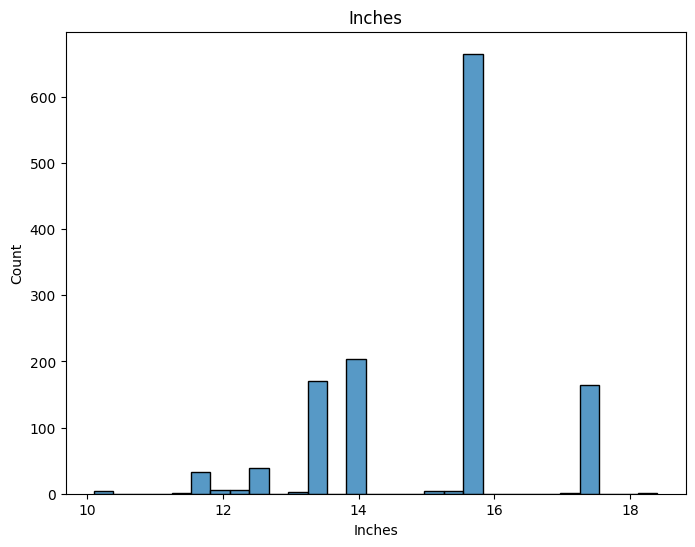

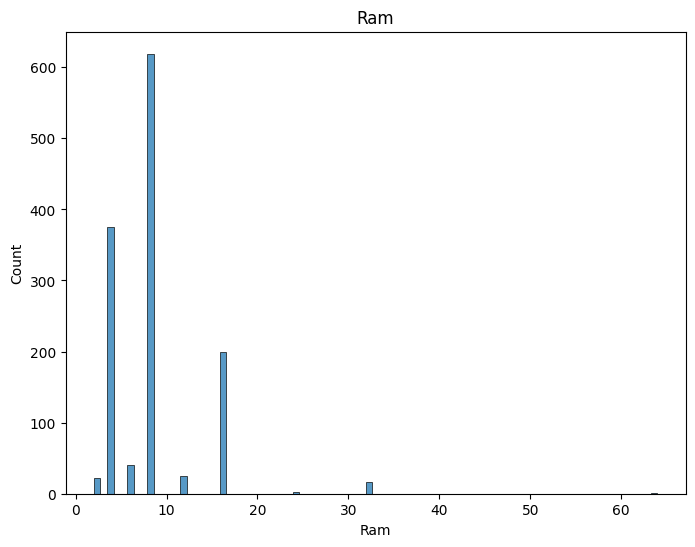

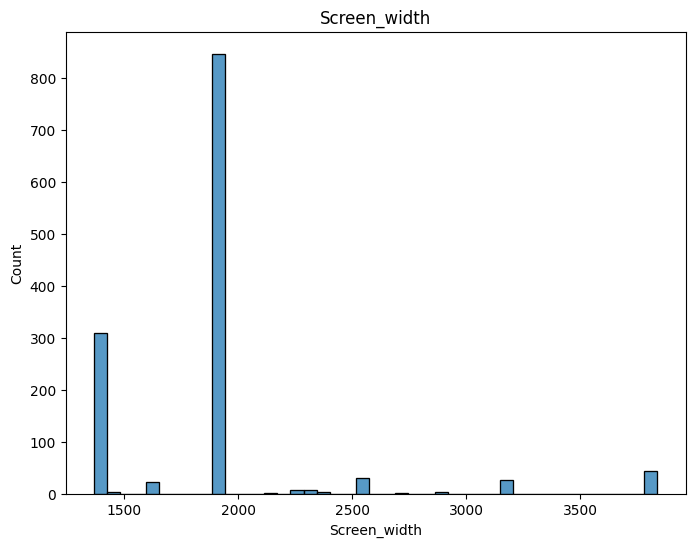

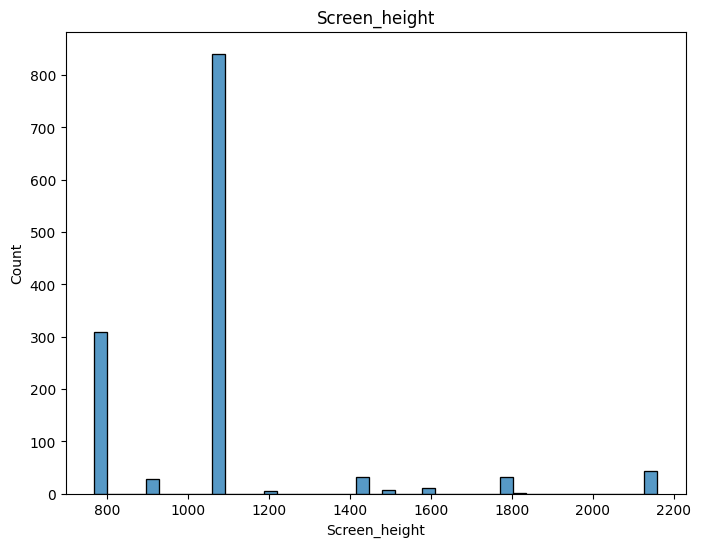

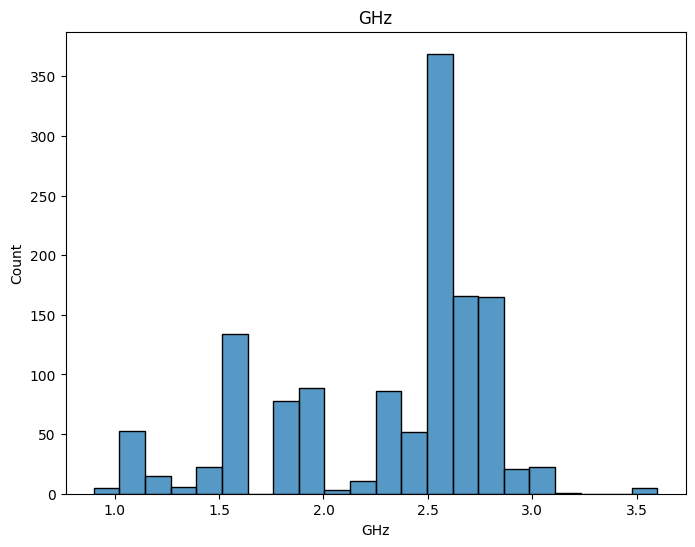

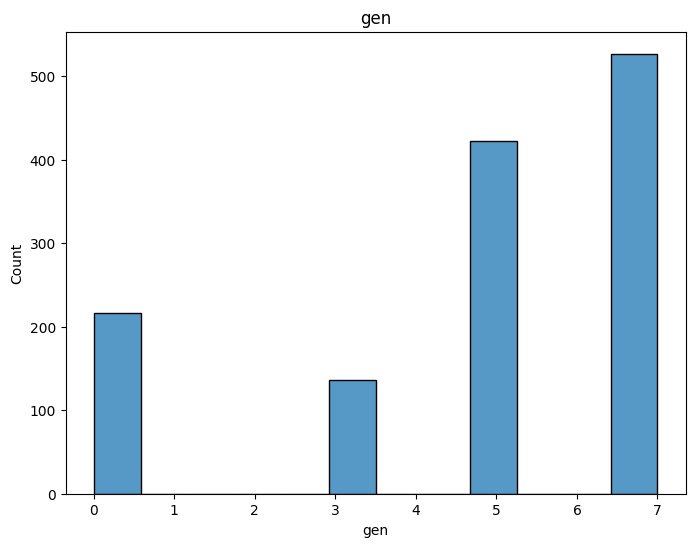

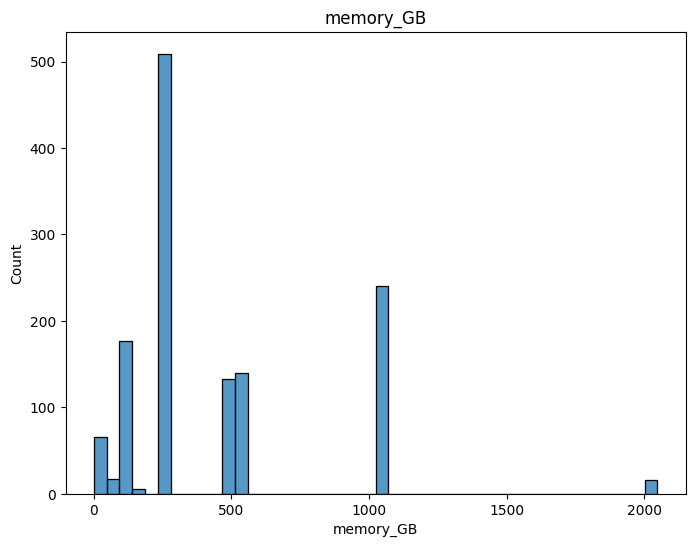

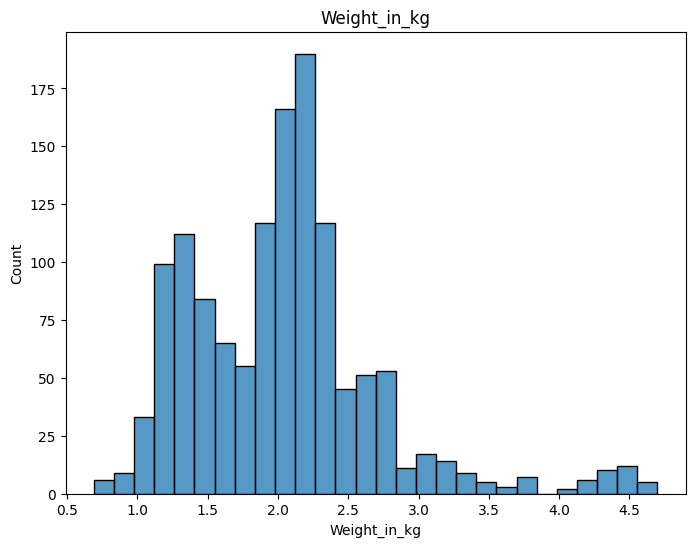

In [ ]:
for i in numerical_cols:
  plt.figure(figsize=(8,6))
  sns.histplot(filtered_data[i])
  plt.title(i)
  plt.show()

<Axes: >

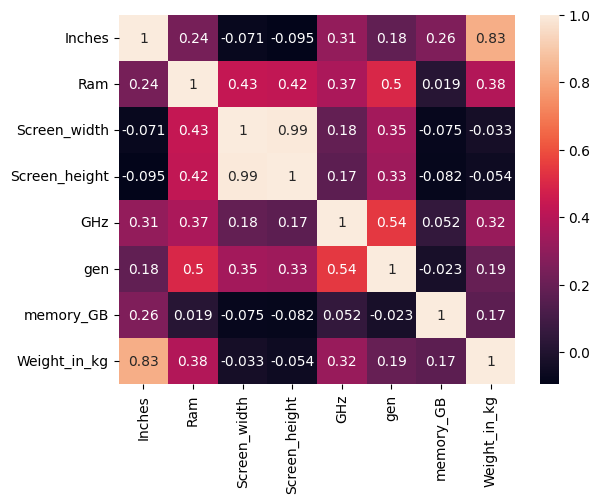

In [ ]:
sns.heatmap(filtered_data[numerical_cols.columns].corr(), annot=True)

In [ ]:
filtered_data[numerical_cols.columns].skew()

,0
Inches,-0.446913
Ram,2.686806
Screen_width,2.188046
Screen_height,2.099301
GHz,-0.832520
gen,-0.927913
memory_GB,1.589747
Weight_in_kg,1.144963


In [ ]:
skewed_data = filtered_data[numerical_cols.columns].skew()
skewed_cols = skewed_data[skewed_data > 0.8].index
skewed_cols

Index(['Ram', 'Screen_width', 'Screen_height', 'memory_GB', 'Weight_in_kg'], dtype='object')

In [ ]:
transformed_data = filtered_data.copy()

In [ ]:
for i in skewed_cols:
  transformed_data[i] = np.log1p(transformed_data[i])

price_log = np.log1p(data['Price'])
price_log

,Price
0,11.175769
1,10.776798
2,10.329964
3,11.814483
4,11.473111
...,...
1298,10.433929
1299,11.288127
1300,9.409365
1301,10.614153


In [ ]:
transformed_data

,Company,TypeName,Inches,Ram,OpSys,screen_type,Screen_width,Screen_height,cpu_Tech,GHz,gen,cpu_Brand,memory_GB,memory_type,Gpu_type,GPU_brand,gpu_series,Weight_in_kg
0,Apple,Ultrabook,13.3,2.197225,macOS,Retina Display,7.848153,7.378384,Intel Core,2.3,5.0,Intel Core,4.859812,SSD,Integrated,Intel,Intel UHD\HD Graphics,0.862890
1,Apple,Ultrabook,13.3,2.197225,macOS,Other,7.273093,6.803505,Intel Core,1.8,5.0,Intel Core,4.859812,Flash,Integrated,Intel,Intel UHD\HD Graphics,0.850151
2,HP,Notebook,15.6,2.197225,No OS,Full HD,7.560601,6.985642,Intel Core,2.5,5.0,Intel Core,5.549076,SSD,Integrated,Intel,Intel UHD\HD Graphics,1.050822
3,Apple,Ultrabook,15.4,2.833213,macOS,Retina Display,7.965893,7.496097,Intel Core,2.7,7.0,Intel Core,6.240276,SSD,Dedicated,AMD,AMD Radeon,1.040277
4,Apple,Ultrabook,13.3,2.197225,macOS,Retina Display,7.848153,7.378384,Intel Core,3.1,5.0,Intel Core,5.549076,SSD,Integrated,Intel,Intel UHD\HD Graphics,0.862890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1.609438,Windows 10,Full HD Touchscreen,7.560601,6.985642,Intel Core,2.5,7.0,Intel Core,4.859812,SSD,Integrated,Intel,Intel UHD\HD Graphics,1.029619
1299,Lenovo,2 in 1 Convertible,13.3,2.833213,Windows 10,Full HD Touchscreen,8.071219,7.496097,Intel Core,2.5,7.0,Intel Core,6.240276,SSD,Integrated,Intel,Intel UHD\HD Graphics,0.832909
1300,Lenovo,Notebook,14.0,1.098612,Windows 10,Other,7.220374,6.645091,Intel Celeron Dual Core,1.6,0.0,Intel Core,4.174387,Flash,Integrated,Intel,Intel UHD\HD Graphics,0.916291
1301,HP,Notebook,15.6,1.945910,Windows 10,Other,7.220374,6.645091,Intel Core,2.5,7.0,Intel Core,6.932448,HDD,Dedicated,AMD,Radeon R_series,1.160021


In [ ]:
transformed_data[numerical_cols.columns].skew()

,0
Inches,-0.446913
Ram,0.423571
Screen_width,0.996539
Screen_height,0.985189
GHz,-0.832520
gen,-0.927913
memory_GB,-1.714882
Weight_in_kg,0.327732


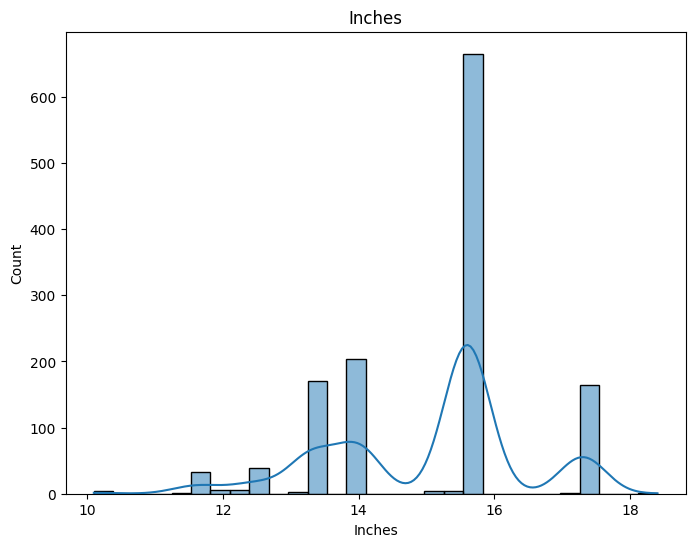

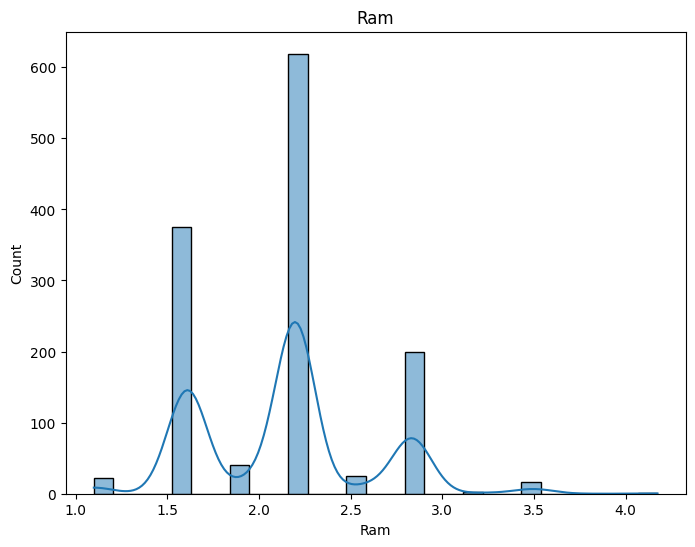

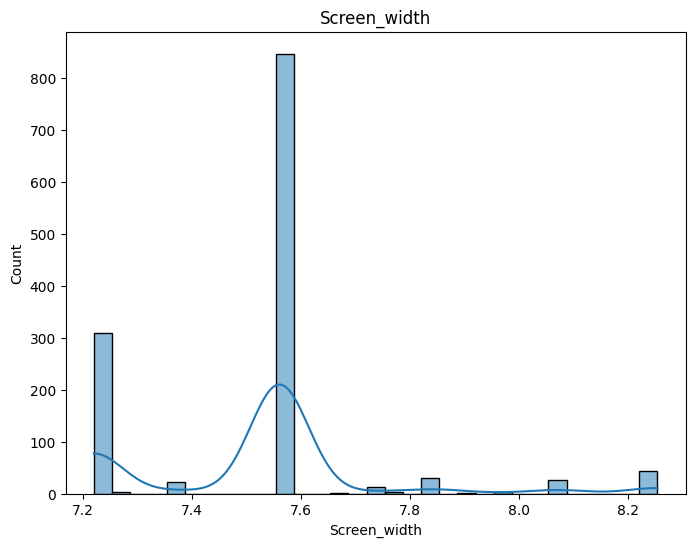

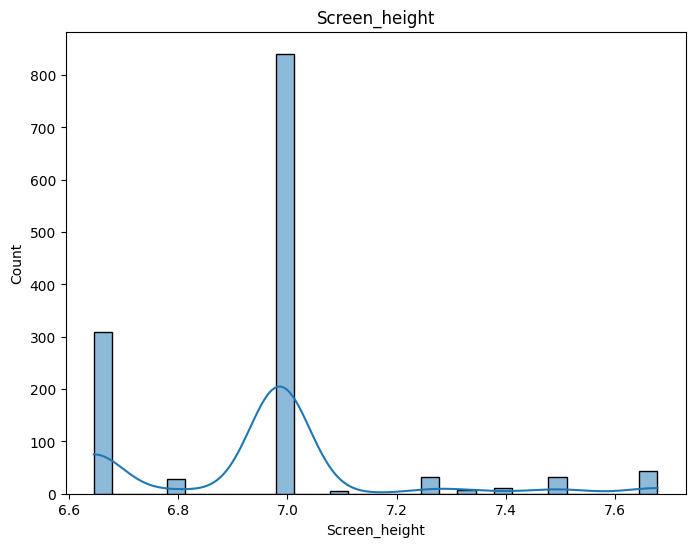

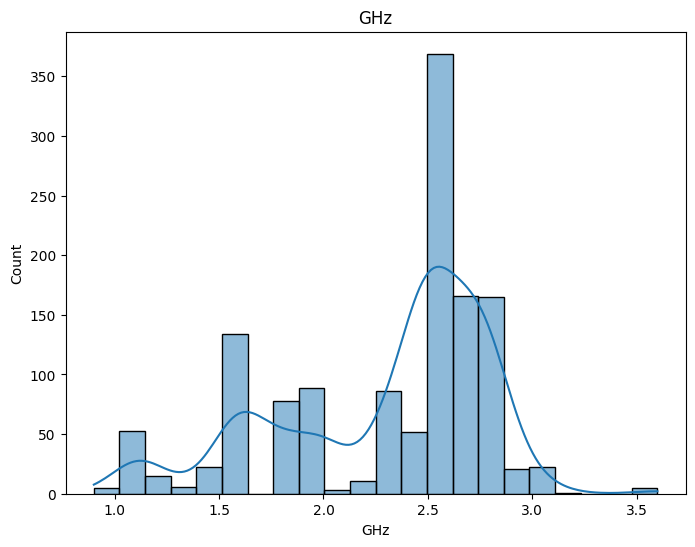

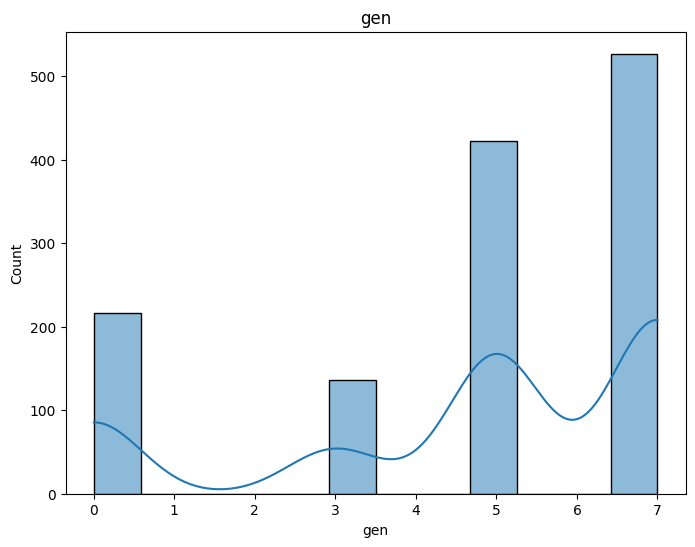

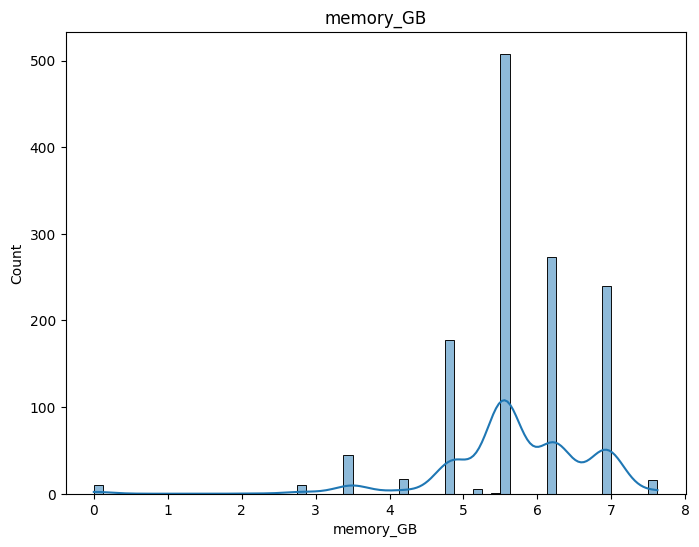

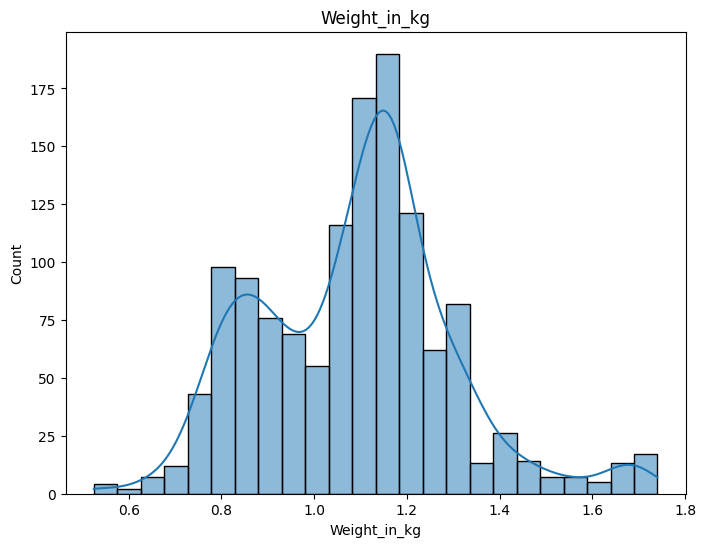

In [ ]:
for i in numerical_cols:
  plt.figure(figsize=(8,6))
  sns.histplot(transformed_data[i], kde=True)
  plt.title(i)
  plt.show()

In [ ]:
number_cols = numerical_cols.columns

In [ ]:
z_score = (transformed_data[number_cols] - transformed_data[number_cols].mean())/ transformed_data[number_cols].std()

In [ ]:
lower = z_score[number_cols].mean() - (5 * z_score[number_cols].std())
upper = z_score[number_cols].mean() + (5 * z_score[number_cols].std())


In [ ]:
z_score[number_cols] = np.where(
    z_score[number_cols] > upper.values,
    upper.values,
    np.where(
        z_score[number_cols] < lower.values,
        lower.values,
        z_score[number_cols]
    )
)
z_score

,Inches,Ram,Screen_width,Screen_height,GHz,gen,memory_GB,Weight_in_kg
0,-1.203945,0.153336,1.457635,1.872248,0.002425,0.093774,-0.857909,-1.087243
1,-1.203945,0.153336,-1.095883,-0.631809,-0.985053,0.093774,-0.857909,-1.148429
2,0.408615,0.153336,0.180780,0.161542,0.397416,0.093774,-0.172016,-0.184596
3,0.268392,1.544002,1.980450,2.384986,0.792407,0.900290,0.515805,-0.235244
4,-1.203945,0.153336,1.457635,1.872248,1.582390,0.093774,-0.172016,-1.087243
...,...,...,...,...,...,...,...,...
1298,-0.713166,-1.131930,0.180780,0.161542,0.397416,0.900290,-0.857909,-0.286431
1299,-1.203945,1.544002,2.448142,2.384986,0.397416,0.900290,0.515805,-1.231243
1300,-0.713166,-2.248911,-1.329978,-1.321830,-1.380044,-1.922517,-1.539983,-0.830756
1301,0.408615,-0.396193,-1.329978,-1.321830,0.397416,0.900290,1.204593,0.339895


In [ ]:
percentile25 = transformed_data[number_cols].quantile(0.25)
percentile75 = transformed_data[number_cols].quantile(0.75)

In [ ]:
iqr = percentile75 - percentile25
low = percentile25 - 1.5 * iqr
up = percentile75 + 1.5 * iqr

with open('lower', 'wb') as f:
  pickle.dump(low, f)

with open('upper', 'wb') as f:
  pickle.dump(up, f)

In [ ]:
transformed_data[number_cols]

,Inches,Ram,Screen_width,Screen_height,GHz,gen,memory_GB,Weight_in_kg
0,13.3,2.197225,7.848153,7.378384,2.3,5.0,4.859812,0.862890
1,13.3,2.197225,7.273093,6.803505,1.8,5.0,4.859812,0.850151
2,15.6,2.197225,7.560601,6.985642,2.5,5.0,5.549076,1.050822
3,15.4,2.833213,7.965893,7.496097,2.7,7.0,6.240276,1.040277
4,13.3,2.197225,7.848153,7.378384,3.1,5.0,5.549076,0.862890
...,...,...,...,...,...,...,...,...
1298,14.0,1.609438,7.560601,6.985642,2.5,7.0,4.859812,1.029619
1299,13.3,2.833213,8.071219,7.496097,2.5,7.0,6.240276,0.832909
1300,14.0,1.098612,7.220374,6.645091,1.6,0.0,4.174387,0.916291
1301,15.6,1.945910,7.220374,6.645091,2.5,7.0,6.932448,1.160021


In [ ]:
transformed_data[number_cols] = np.where(
    transformed_data[number_cols].values > up.values,
    up.values,
    np.where(
        transformed_data[number_cols].values < low.values,
        low.values,
        transformed_data[number_cols]
    )
)
transformed_data

,Company,TypeName,Inches,Ram,OpSys,screen_type,Screen_width,Screen_height,cpu_Tech,GHz,gen,cpu_Brand,memory_GB,memory_type,Gpu_type,GPU_brand,gpu_series,Weight_in_kg
0,Apple,Ultrabook,13.3,2.197225,macOS,Retina Display,7.833927,7.258847,Intel Core,2.3,5.0,Intel Core,4.859812,SSD,Integrated,Intel,Intel UHD\HD Graphics,0.862890
1,Apple,Ultrabook,13.3,2.197225,macOS,Other,7.273093,6.803505,Intel Core,1.8,5.0,Intel Core,4.859812,Flash,Integrated,Intel,Intel UHD\HD Graphics,0.850151
2,HP,Notebook,15.6,2.197225,No OS,Full HD,7.560601,6.985642,Intel Core,2.5,5.0,Intel Core,5.549076,SSD,Integrated,Intel,Intel UHD\HD Graphics,1.050822
3,Apple,Ultrabook,15.4,2.833213,macOS,Retina Display,7.833927,7.258847,Intel Core,2.7,7.0,Intel Core,6.240276,SSD,Dedicated,AMD,AMD Radeon,1.040277
4,Apple,Ultrabook,13.3,2.197225,macOS,Retina Display,7.833927,7.258847,Intel Core,3.1,5.0,Intel Core,5.549076,SSD,Integrated,Intel,Intel UHD\HD Graphics,0.862890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1.609438,Windows 10,Full HD Touchscreen,7.560601,6.985642,Intel Core,2.5,7.0,Intel Core,4.859812,SSD,Integrated,Intel,Intel UHD\HD Graphics,1.029619
1299,Lenovo,2 in 1 Convertible,13.3,2.833213,Windows 10,Full HD Touchscreen,7.833927,7.258847,Intel Core,2.5,7.0,Intel Core,6.240276,SSD,Integrated,Intel,Intel UHD\HD Graphics,0.832909
1300,Lenovo,Notebook,14.0,1.098612,Windows 10,Other,7.220374,6.645091,Intel Celeron Dual Core,1.6,0.0,Intel Core,4.512276,Flash,Integrated,Intel,Intel UHD\HD Graphics,0.916291
1301,HP,Notebook,15.6,1.945910,Windows 10,Other,7.220374,6.645091,Intel Core,2.5,7.0,Intel Core,6.932448,HDD,Dedicated,AMD,Radeon R_series,1.160021


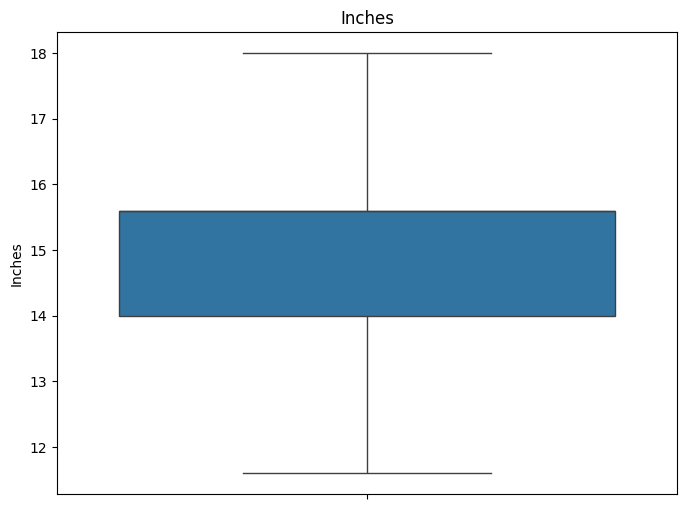

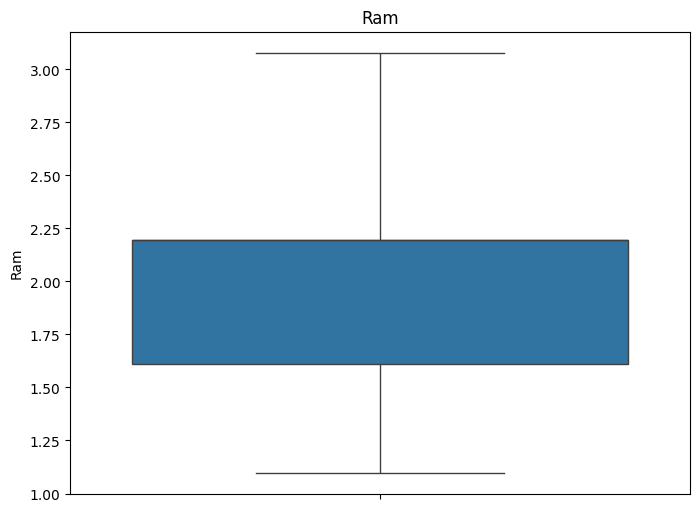

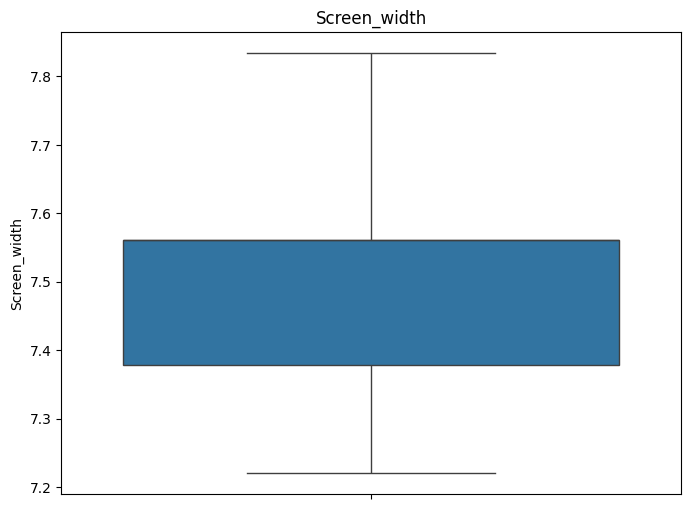

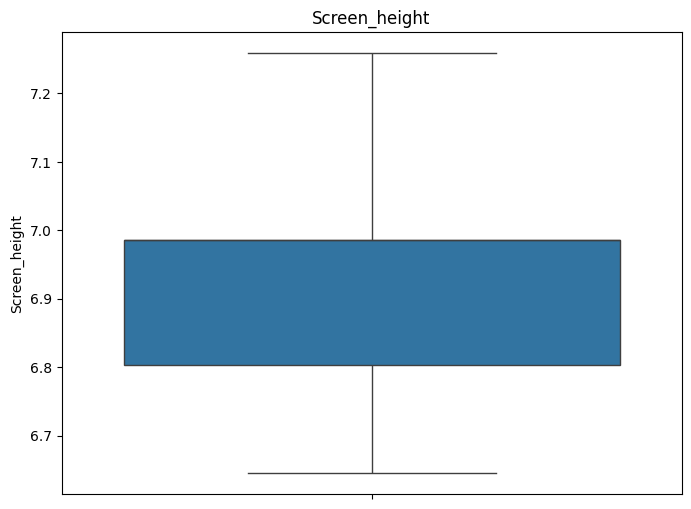

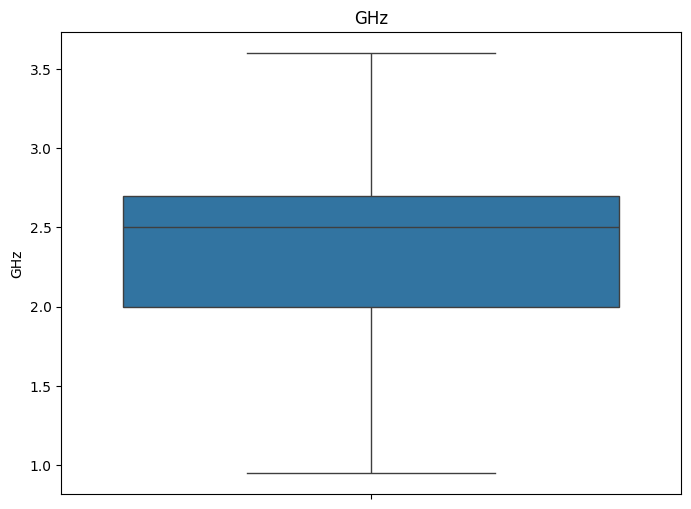

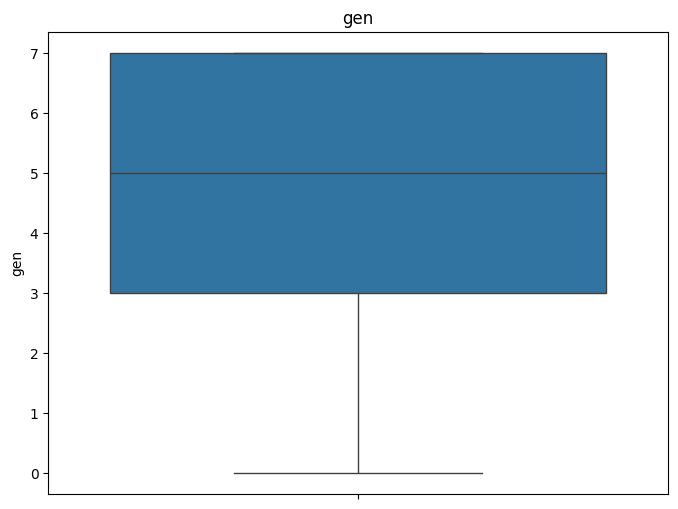

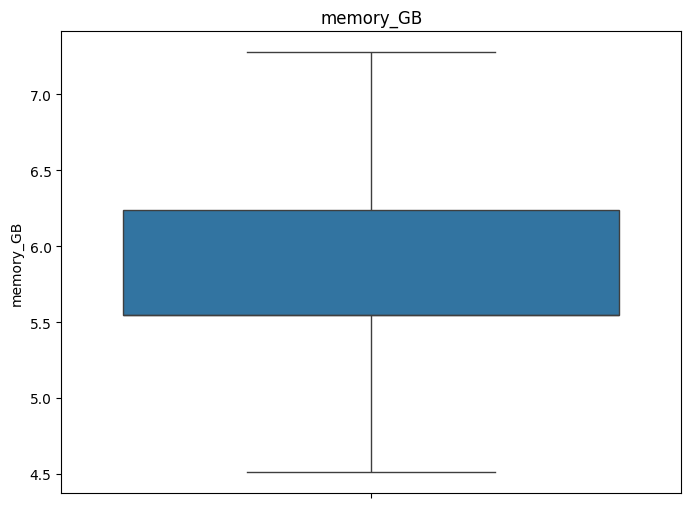

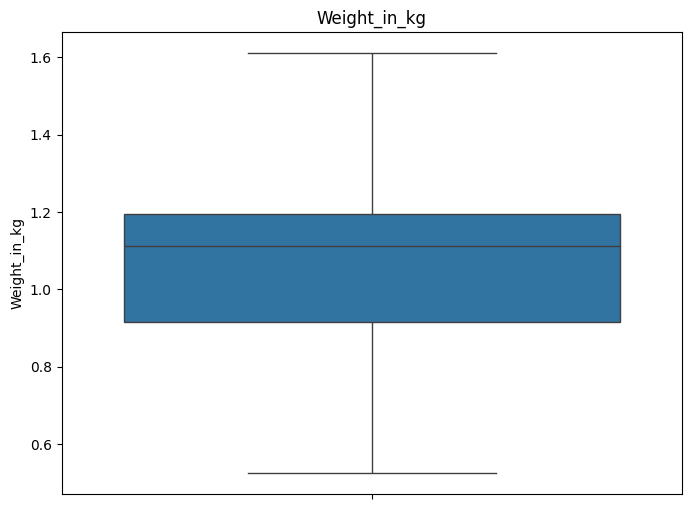

In [ ]:
for i in numerical_cols:
  plt.figure(figsize=(8,6))
  sns.boxplot(transformed_data[i])
  plt.title(i)
  plt.show()

In [ ]:
# transformed_data = z_score.join(transformed_data[categorical_cols.columns], how='right')

In [ ]:
transformed_data

,Company,TypeName,Inches,Ram,OpSys,screen_type,Screen_width,Screen_height,cpu_Tech,GHz,gen,cpu_Brand,memory_GB,memory_type,Gpu_type,GPU_brand,gpu_series,Weight_in_kg
0,Apple,Ultrabook,13.3,2.197225,macOS,Retina Display,7.833927,7.258847,Intel Core,2.3,5.0,Intel Core,4.859812,SSD,Integrated,Intel,Intel UHD\HD Graphics,0.862890
1,Apple,Ultrabook,13.3,2.197225,macOS,Other,7.273093,6.803505,Intel Core,1.8,5.0,Intel Core,4.859812,Flash,Integrated,Intel,Intel UHD\HD Graphics,0.850151
2,HP,Notebook,15.6,2.197225,No OS,Full HD,7.560601,6.985642,Intel Core,2.5,5.0,Intel Core,5.549076,SSD,Integrated,Intel,Intel UHD\HD Graphics,1.050822
3,Apple,Ultrabook,15.4,2.833213,macOS,Retina Display,7.833927,7.258847,Intel Core,2.7,7.0,Intel Core,6.240276,SSD,Dedicated,AMD,AMD Radeon,1.040277
4,Apple,Ultrabook,13.3,2.197225,macOS,Retina Display,7.833927,7.258847,Intel Core,3.1,5.0,Intel Core,5.549076,SSD,Integrated,Intel,Intel UHD\HD Graphics,0.862890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1.609438,Windows 10,Full HD Touchscreen,7.560601,6.985642,Intel Core,2.5,7.0,Intel Core,4.859812,SSD,Integrated,Intel,Intel UHD\HD Graphics,1.029619
1299,Lenovo,2 in 1 Convertible,13.3,2.833213,Windows 10,Full HD Touchscreen,7.833927,7.258847,Intel Core,2.5,7.0,Intel Core,6.240276,SSD,Integrated,Intel,Intel UHD\HD Graphics,0.832909
1300,Lenovo,Notebook,14.0,1.098612,Windows 10,Other,7.220374,6.645091,Intel Celeron Dual Core,1.6,0.0,Intel Core,4.512276,Flash,Integrated,Intel,Intel UHD\HD Graphics,0.916291
1301,HP,Notebook,15.6,1.945910,Windows 10,Other,7.220374,6.645091,Intel Core,2.5,7.0,Intel Core,6.932448,HDD,Dedicated,AMD,Radeon R_series,1.160021


In [ ]:
transformed_data.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
OpSys,0
screen_type,0
Screen_width,0
Screen_height,0
cpu_Tech,0
GHz,0


## Model Selection

In [ ]:
x = transformed_data
y = price_log

In [ ]:
category_cols = categorical_cols.columns
category_cols = ['Company', 'TypeName', 'OpSys', 'screen_type', 'cpu_Tech','cpu_Brand','memory_type', 'Gpu_type', 'GPU_brand', 'gpu_series']
number_cols

Index(['Inches', 'Ram', 'Screen_width', 'Screen_height', 'GHz', 'gen',
       'memory_GB', 'Weight_in_kg'],
      dtype='object')

In [ ]:
# numerical_cols.drop(columns=['Price'], inplace=True)
number_cols = numerical_cols.columns
number_cols

Index(['Inches', 'Ram', 'Screen_width', 'Screen_height', 'GHz', 'gen',
       'memory_GB', 'Weight_in_kg'],
      dtype='object')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 48)

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
transformer = ColumnTransformer(transformers=[
    ('ohe',ohe,category_cols),
    ('scaler', StandardScaler(),number_cols)
])
train_fit = transformer.fit_transform(x_train)
test_fit = transformer.transform(x_test)

with open('OHE','wb') as f:
  pickle.dump(transformer, f)

## Model Fit


In [ ]:
lr = LinearRegression()

In [ ]:
model_fit = lr.fit(train_fit, y_train)
pred = model_fit.predict(test_fit)

with open('Prediction','wb') as f:
  pickle.dump(model_fit, f)
pred

array([11.45613816, 11.59385921, 10.42931379, 11.43083348, 11.31627745,
       10.6876202 , 11.0669445 , 10.63597092, 11.35712461, 10.72722195,
       11.06413019, 10.52745549, 11.35312072, 11.00575036, 11.01063996,
       11.32459387, 10.43057877, 10.7178578 , 11.97934863, 11.84923401,
       10.70126568, 10.60706337, 11.45071984, 10.58264269, 10.38437159,
       11.17101473, 11.45222967,  9.88031626, 10.85220887, 11.04802298,
        9.92249054, 11.07341305,  9.56490558,  9.84225078, 11.06089415,
       10.98072122, 11.36454831, 10.97962403,  9.86390291,  9.56028915,
       11.15731888, 10.64180544, 11.23672257, 10.86352998, 11.56242419,
       11.14487149, 10.64740506, 10.52745549, 10.23845787, 11.34281809,
       10.69381822, 10.128343  , 10.89427965,  9.8494255 , 11.18777105,
       11.17697385, 10.34936706, 10.42076529, 10.08424221, 10.8109561 ,
       10.79849897, 10.79770344, 10.94055039, 11.69576655, 10.71919388,
       11.23165988, 10.90304782,  9.98303232, 11.79126412, 11.47

In [ ]:
actual_pred = np.expm1(pred)
pd.DataFrame(actual_pred).head(10)

,0
0,94478.499946
1,108428.905371
2,33836.122976
3,92117.721663
4,82146.973145
5,43809.123604
6,64018.595592
7,41603.804135
8,85571.958492
9,45578.892656


In [ ]:
actual_y = np.expm1(y_test)
pd.DataFrame(actual_y).head(10)

,Price
998,95850.7200
1081,172627.2000
1111,40980.3120
1212,103842.1872
1149,124621.9200
976,53386.5600
414,49443.8400
990,101658.2400
788,122490.7200
1093,43601.6880


In [ ]:
r2_score(y_test, pred)

0.8514357436330444

In [ ]:
lr.score(test_fit, y_test)

0.8514357436330444

## Inputs


In [ ]:
def input(Company,	TypeName,	Inches,	ScreenResolution,	Cpu,	Ram, Memory,	Gpu,	OpSys,	Weight):
  li = [[ Company,	TypeName,	Inches,	ScreenResolution,	Cpu,	Ram, Memory,	Gpu,	OpSys,	Weight]]
  user_data = pd.DataFrame(data=li, columns=['Company',	'TypeName',	'Inches',	'ScreenResolution',	'Cpu',	'Ram', 'Memory',	'Gpu',	'OpSys',	'Weight'])
  return feature_extraction(user_data)
def feature_extraction(user_data):
  ty = []
  for i in user_data['ScreenResolution']:
    if "Retina Display" in i:
      ty.append("Retina Display")
    elif "Full HD" and 'Touchscreen' in i:
      ty.append("Full HD Touchscreen")
    elif "Full HD"in i:
      ty.append("Full HD")
    elif '4K Ultra HD' in i:
      ty.append("4K")
    elif 'Quad' in i:
      ty.append("Quad")
    elif 'IPS Panel' in i:
      ty.append("IPS Panel")
    else:
      ty.append('Other')
  ty

  feature_data = user_data.copy()
  feature_data['screen_type'] = pd.DataFrame(ty)

  feature_data.drop(columns=['ScreenResolution'], inplace=True)

  screen_size = []
  for i in user_data['ScreenResolution']:
    screen_size.append(re.findall(r'\d+', i))
  filter_list = []
  for i in screen_size:
    if len(i) < 3:
      i = ['0'] + i
    filter_list.append([int(x) for x in i])
  filter_list = pd.DataFrame(filter_list)
  feature_data['Screen_width'] = filter_list[1]
  feature_data['Screen_height'] = filter_list[2]

  cpu_li = []
  for i in data['Cpu']:
    if 'Intel Core' in i:
      cpu_li.append('Intel Core')
    elif 'Celeron Dual Core' in i:
      cpu_li.append('Intel Celeron Dual Core')
    elif ' Pentium' in i:
      cpu_li.append('Intel  Pentium Cores')
    elif 'Celeron Quad Core' in i:
      cpu_li.append('Intel Celeron Quad Core')
    elif 'Intel Atom' in i:
      cpu_li.append('Intel Atom')
    elif 'E-Series' in i:
      cpu_li.append('AMD E-Series')
    elif 'AMD A' in i:
      cpu_li.append('AMD A-Series')
    elif 'Xeon' in i:
      cpu_li.append('Intel Xeon')
    elif 'Ryzen' in i:
      cpu_li.append('AMD Ryzen')
    elif 'FX' in i:
      cpu_li.append('AMD FX')
    else:
      cpu_li.append(i)


  feature_data['cpu_Tech'] = pd.DataFrame(cpu_li)
  ghz = []
  for i in user_data['Cpu']:
    var = re.findall(r"(\d+\.\d+|\d+)GHz",i)
    ghz.append([float(x) for x in var])


  feature_data['GHz'] = pd.DataFrame(ghz)

  cpu = []
  for i in user_data['Cpu']:
    cpu_var = re.findall(r'i(\d+)',i)
    cpu.append([int(x) for x in cpu_var])


  feature_data['gen'] = pd.DataFrame(cpu, columns=['gen'])

  li = []
  for i in user_data['Cpu']:
    st = re.findall(r'(\w+)',i)
    if 'Core' in st:
      li.append('Intel Core')
    elif 'Atom' in st:
      li.append('Intel Atom')
    elif 'Xeon' in st:
      li.append('Intel Xeon')
    elif 'AMD' in st:
      li.append('AMD')
    else:
      li.append('ohters')

  feature_data['cpu_Brand'] = pd.DataFrame(li)
  feature_data.drop(columns=['Cpu'], inplace=True)

  ram = []
  for i in user_data['Ram']:
    ram_var = re.findall(r"(\d+)",i)
    ram.append([int(x) for x in ram_var])

  feature_data['Ram'] = pd.DataFrame(ram)

  memory = []
  for i in user_data['Memory']:
    st = re.findall(r'\d+(\w+)',i)
    size = re.findall(r'(\d+)\w+',i)
    if 'TB' in st[0]:
      size[0] = int(size[0]) * 1024
    memory.append([int(x) for x in size])
  memory = pd.DataFrame(memory)

  feature_data['memory_GB'] = memory[0]

  m_ty = []
  for i in user_data['Memory']:
    m_ty.append(re.findall(r'\w+',i))
  m_ty = pd.DataFrame(m_ty)

  feature_data['memory_type'] = m_ty[1]
  feature_data.drop(columns=['Memory'], inplace=True)

  d = []
  for i in user_data['Gpu']:
    d.append(re.findall(r'(\w+)', i))
  d = pd.DataFrame(d)



  technology = []
  for i in user_data['Gpu']:
    if "Intel HD" in i or "Intel Iris" in i or "Intel UHD" in i:
          technology.append("Integrated")
    elif "Mali" in i:
        technology.append("Integrated")
    else:
          technology.append("Dedicated")


  feature_data['Gpu_type'] = pd.DataFrame(technology)

  brnd = []
  for i in user_data['Gpu']:
    if 'Intel' in i:
      brnd.append('Intel')
    elif 'AMD' in i:
      brnd.append('AMD')
    elif 'Nvidia' in i:
      brnd.append('Nvidia')
    elif 'ARM' in i:
      brnd.append('ARM')
    else:
      brnd.append('ohter')

  feature_data['GPU_brand'] = pd.DataFrame(brnd)

  gpu_series = []
  for i in user_data['Gpu']:
    if 'Graphics' in i:
      gpu_series.append('Intel UHD\HD Graphics')
    elif 'GTX' in i:
      gpu_series.append('GTX')
    elif 'GeForce' in i:
      gpu_series.append('GeForce')
    elif 'Radeon RX' in i:
      gpu_series.append('AMD Radeon RX')
    elif 'Radeon R' in i:
      gpu_series.append('Radeon R_series')
    elif 'Quadro' in i:
      gpu_series.append('Quadro')
    elif 'Radeon' in i:
      gpu_series.append('AMD Radeon')
    elif 'FirePro' in i:
      gpu_series.append('AMD FirePro')
    else:

      gpu_series.append('Other')

  fi = pd.DataFrame(gpu_series)
  feature_data['gpu_series'] = fi[0]

  feature_data.drop(columns=['Gpu'], inplace=True)


  kg = []
  st = []
  for i in user_data['Weight']:
    k_var = re.findall(r'(\d+\.\d+|\d+)',i)
    st.append(re.findall(r'\d+(\w+)',i))
    kg.append([float(x) for x in k_var])

  feature_data['Weight_in_kg'] = pd.DataFrame(kg)

  feature_data.drop(columns=['Weight'], inplace=True)
  return transform(feature_data)
def transform(feature_data):
  feature_data['Inches'] = feature_data['Inches'].astype(float)
  numerical_cols = feature_data.select_dtypes(include=['int64','float64'])
  categorical_cols = feature_data.select_dtypes(include=['object'])

  number_cols = numerical_cols.columns

  log_array = ['Ram', 'Screen_width', 'Screen_height', 'memory_GB',
       'Weight_in_kg']
  transform_data = feature_data[['Inches',	'Ram',	'Screen_width',	'Screen_height',	'GHz',	'gen',	'memory_GB',	'Weight_in_kg',	'Company',	'TypeName',	'OpSys',	'screen_type',	'cpu_Tech',	'cpu_Brand',	'memory_type',	'Gpu_type',	'GPU_brand',	'gpu_series']].copy()

  for i in log_array:
    transform_data[i] = np.log1p(transform_data[i])
  with open('lower', 'rb') as f:
    l = pickle.load(f)

  with open('upper', 'rb') as f:
    u = pickle.load(f)

  transform_data[number_cols] = np.where(
    transform_data[number_cols] > u.values,
    u.values,
    np.where(
        transform_data[number_cols] < l.values,
        l.values,
        transform_data[number_cols]
    )
  )


  with open('OHE', 'rb') as f:
    oh = pickle.load(f)

  hi = oh.transform(transform_data)

  with open('Prediction', 'rb') as f:
    model = pickle.load(f)

  predicted = model.predict(hi)

  print(np.expm1(predicted))
  price = np.expm1(predicted)[0]
  return price.astype('int')

In [ ]:
input('MSI','Gaming','17.3','IPS Panel Full HD 1920x1080','Intel Core i7 6700HQ 2.6GHz','16GB','256GB SSD + 1TB HDD','Nvidia GeForce GTX 1060','Windows 10','2.43kg')

[92117.72166302]


np.int64(92117)

!pip install gradio

In [ ]:
data.iloc[1212,:]

,1212
Unnamed: 0,1212
Company,MSI
TypeName,Gaming
Inches,17.3
ScreenResolution,IPS Panel Full HD 1920x1080
Cpu,Intel Core i7 6700HQ 2.6GHz
Ram,16GB
Memory,256GB SSD + 1TB HDD
Gpu,Nvidia GeForce GTX 1060
OpSys,Windows 10


In [ ]:
data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [ ]:
data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

## Gradio Interface

In [ ]:
import gradio as gr
demo = gr.Interface(
    fn=input,
    title = 'Predict Laptop Price',
    inputs=[
            gr.Textbox(lines=1, placeholder = 'Apple', value='Apple'),
            gr.Dropdown(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible','Workstation','Other'],value='Ultrabook'),
            gr.Textbox(lines=1, placeholder="13.5", value=13.5),
            gr.Textbox(lines=1, placeholder= "IPS Panel Retina Display 2880x1800 or 1366x768",value='IPS Panel Retina Display 2880x1800 or 1366x768'),
            gr.Textbox(lines=1, placeholder='Intel Core i7 6500U 2.5GHz',value='Intel Core i7 6500U 2.5GHz'),
            gr.Textbox(lines=1, placeholder="4GB",value="4GB"),
            gr.Textbox(lines=1, placeholder="64GB Flash Storage",value="64GB Flash Storage"),
            gr.Textbox(lines=1, placeholder="Intel HD Graphics",value="Intel HD Graphics"),
            gr.Dropdown(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android','Windows 10 S', 'Chrome OS', 'Windows 7','other'],value='macOS'),
            gr.Textbox(lines=1, placeholder='2.2kg',value='2.2kg')
            ],
    outputs=gr.Textbox()
)

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://76294532317b272c9d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
np.array(data.iloc[1111,:])

array([np.int64(1111), 'Dell', 'Notebook', np.float64(15.6), '1366x768',
       'Intel Core i5 6200U 2.3GHz', '4GB', '500GB HDD',
       'AMD Radeon R5 M315', 'Windows 7', '2.24kg', np.float64(40980.312)],
      dtype=object)

In [ ]:
# prompt: create a custom gradio css

import gradio as gr

demo = gr.Interface(
    fn=input,
    title = 'Predict Laptop Price',
    inputs=[
            gr.Textbox(lines=1, placeholder = 'Apple', value='Apple'),
            gr.Dropdown(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible','Workstation','Other'],value='Ultrabook'),
            gr.Textbox(lines=1, placeholder="13.5", value=13.5),
            gr.Textbox(lines=1, placeholder= "IPS Panel Retina Display 2880x1800 or 1366x768",value='IPS Panel Retina Display 2880x1800 or 1366x768'),
            gr.Textbox(lines=1, placeholder='Intel Core i7 6500U 2.5GHz',value='Intel Core i7 6500U 2.5GHz'),
            gr.Textbox(lines=1, placeholder="4GB",value="4GB"),
            gr.Textbox(lines=1, placeholder="64GB Flash Storage",value="64GB Flash Storage"),
            gr.Textbox(lines=1, placeholder="Intel HD Graphics",value="Intel HD Graphics"),
            gr.Dropdown(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android','Windows 10 S', 'Chrome OS', 'Windows 7','other'],value='macOS'),
            gr.Textbox(lines=1, placeholder='2.2kg',value='2.2kg')
            ],
    outputs=["text"],
    theme=gr.themes.Soft()
)

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://29bad799a45154d9ac.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
